In [27]:
 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [28]:
documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

In [29]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

In [30]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=2, n_init=1)

In [31]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 google
 climbing
 ninja
 map
 app
 feedback
 impressed
 incredible
 translate
 cat
Cluster 1:
 best
 ve
 photo
 taken
 belly
 merley
 kitten
 squooshy
 cat
 promoter


In [32]:
print("\n")
print("Prediction")

Y = vectorizer.transform(["chrome is a web browser app."])
prediction = model.predict(Y)
print(prediction)



Prediction
[0]


In [33]:
Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

[0]


### Clustering for Dataset

In [34]:
import pandas as pd

df = pd.read_csv("dataset/filtere_dice_jobs_dataset.csv")

#### Pre-processing

In [35]:
df.skills

0       Configuration Management, Developer, Linux, Ma...
1       Cisco, DNS, HTTP, Networking, Network Engineer...
2       C++, Developer, Development, JavaScript, User ...
3                                           mobile device
4                                 AI, Maya, Browzwear, 3D
                              ...                        
1558             Java, Spring, FIT, Restful, web services
1559                                     .net, sql server
1560    Project Manager, PMP, IT, Business, Documentation
1561    Ceph, HDFS , C , Linux kernel internals, espec...
1562    Firewalls, load balancing, routing, switching,...
Name: skills, Length: 1563, dtype: object

In [36]:
import texthero as hero 
from texthero import preprocessing

In [37]:
custom_pipeline = [preprocessing.fillna,
                   preprocessing.lowercase,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_diacritics,
                   preprocessing.remove_brackets,
                   preprocessing.remove_punctuation
                  ]
df['skills'] = hero.clean(df['skills'], custom_pipeline)

In [38]:
df['skills'] 

0       configuration management  developer  linux  ma...
1       cisco  dns  http  networking  network engineer...
2       c  developer  development  javascript  user in...
3                                           mobile device
4                                 ai  maya  browzwear  3d
                              ...                        
1558             java  spring  fit  restful  web services
1559                                      net  sql server
1560    project manager  pmp  it  business  documentation
1561    ceph  hdfs   c   linux kernel internals  espec...
1562    firewalls  load balancing  routing  switching ...
Name: skills, Length: 1563, dtype: object

In [39]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df.skills)

### Finding Optimal Clusters

In [40]:
wcss=[]
for i in range(1, 51):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

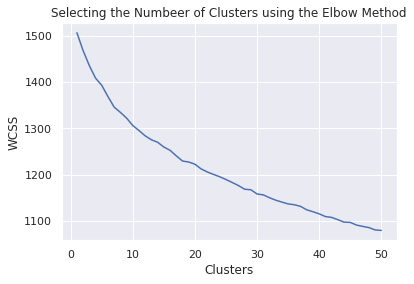

In [42]:
sns.set()
plt.plot(range(1, 51), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
true_k = 44
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=44, n_init=1)

In [44]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 experience
 years
 preferred
 degree
 strong
 bachelor
 related
 knowledge
 required
 enterprise
Cluster 1:
 data
 architect
 scientist
 analyst
 analytics
 sql
 modeling
 mapping
 analysis
 architecture
Cluster 2:
 job
 description
 time
 java
 python
 sql
 agile
 sdlc
 javascript
 pmp
Cluster 3:
 ui
 ux
 net
 web
 mongodb
 aws
 development
 java
 spring
 end
Cluster 4:
 software
 engineer
 java
 developer
 php
 sql
 linux
 embedded
 oop
 testing
Cluster 5:
 net
 sql
 javascript
 html
 asp
 programming
 bpm
 pl
 jquery
 css
Cluster 6:
 excel
 powerpoint
 sql
 microsoft
 word
 analyst
 skills
 analysis
 suite
 querying
Cluster 7:
 technical
 writer
 writing
 documentation
 excel
 api
 sharepoint
 user
 microsoft
 documents
Cluster 8:
 net
 developer
 wpf
 script
 application
 json
 xml
 web
 java
 stack
Cluster 9:
 cisco
 bgp
 mpls
 ospf
 ip
 tcp
 eigrp
 switching
 layer
 voip
Cluster 10:
 wan
 lan
 cisco
 switches
 network
 routers
 security
 vpn
 ma

In [52]:
print("\n")
print("Prediction")

Y = vectorizer.transform(["python sql"])
prediction = model.predict(Y)
print(prediction)



Prediction
[42]
